## <font color='#655588'><b>An Exploratory Analysis of the Iris Data Set</b></font></h2>
<sub><b>Author</b>: Mark Gallagher</b></sub>
<br>
<sub><b>Module</b>: Programming and Scripting (ATU)</sub>
<br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBmlP5kPVYSNI04lQYiYbFI_Kxd1BXuwcQbIl4O4BgvQ&s" width="200">

<sub><b>[Figure 1. Iris Flower Botanical Painting by Kseniia Tikhomirova](https://www.artmajeur.com/ksyusha-sokolova/en/artworks/14044745/iris-flower-botanical-painting)</b></sub>

***

#### <font color='#866c46'><b>Table of contents</b></font><a class='anchor' id='top'></a>

- [Section 1: Introduction](#section1)
- [Section 2: Import Libraries](#section2)
- [Section 3: Load the Data](#section3)
- [Section 4: Inspect the Data](#section4)
- [Section 5: Data Summary](#section5)
- [Section 6: Data Visualisation (Bar Chart)](#section6)
- [Section 7: Data Visualisation (Histogram)](#section7)
- [Section 8: Data Visualisation (Two Variable Plot)](#section8)
- [Section 9: Experimenting with Seaborn Library](#section9)

> <b>Note:</b> This works when I code it, and then decides not to :(

<sub><b>source: [How to Add a Table of Content in the Jupyter Notebook](#)</b></sub>

***

#### <a class="anchor" id="section1"><font color='#866c46'><b>Section 1. Introduction</b></font></a>

The Fisher Iris data set was introduced by biologist [Sir Ronald Aylmer Fisher](https://www.britannica.com/biography/Ronald-Aylmer-Fisher) in 1936 as an example of discriminant analysis. It contains 50 samples from each of three species of Iris flowers (Iris Setosa, Iris Virginica , and Iris Versicolor).
<br><br>
Four features were measured (from each of the samples); the length and width of sepal and petal (in cm). Based on the combination of the four features, Fisher developed a linear discriminant model to distinguish the species from one another.
<br><br>
<sub><b>source: [Tutorial: Analysis of the Fisher Iris Dataset](https://www.idiap.ch/software/beat/docs/bob/docs/v7.0.0/example.html)</b></sub>

***

#### <a class="anchor" id="chapter-2"><font color='#866c46'><b>Section 2. Import Libraries</b></font></a>

The first step is importing the necessary libraries. For this project, I will be using the following:
<ol>
<li><b>pandas</b>: data manipulation library in Python, providing data structures and functions needed to manipulate and analyse structured data</li>
<li><b>numpy</b>: for numerical computing in Python</li>
<li><b>matplotlib</b>: a plotting library for Python for creating plots and visualisations.</li>
<li><b>seaborn</b>: data visualisation library based on matplotlib.</li>
</ol>
<br>
These libraries will allow me to thoroughly investigate the data (and associated csv files) amongst other features

In [38]:
# Importing the relevant libraries for my analysis
import pandas as pd  # Data Analysis
import numpy as np # Scientific Computing
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
import warnings # Suppression of Warnings

<sub><b>source: [Top 30 Python Libraries To Know](https://www.mygreatlearning.com/blog/open-source-python-libraries/)</b></sub>

---

#### <a class="anchor" id="section3"><font color='#866c46'><b>Section 3: Load the Data</b></font></a>

Importing data is the first step in any exploratory data analysis. Let's load the Iris data, and validate it by viewing the first 5 rows.
<br><br>
For this exercise, I have stored the data inside a csv file (in my repository) called 'data.csv'.

In [3]:
# Read the CSV file from a URL 
iris = pd.read_csv('data.csv') # CSV file created and data loaded directly

# Presenting the first 5 rows
iris_head = iris.head()
print(iris_head)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<sub><b>Source</b>: [Iris](https://archive.ics.uci.edu/dataset/53/iris)</sub>
<br>
<sub><b>Source</b>: [Iris Species](https://www.kaggle.com/datasets/uciml/iris)</b></sub>

***

#### <a class="anchor" id="section4"><font color='#866c46'><b>Secition 4: Inspect Data</b></font></a>

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Ax8pt56OKazn8Lr3SXnK_g.png" width="500">

<sub><b>Figure 2. A visual description of various features of Iris Species</b></sub>

In [4]:
# 4.1 - Getting information about the dataset. 
iris_shape = iris.shape
print(iris_shape)

(150, 5)


<sub><b>Analysis:</b> This quickly illustrates that the data frame array contains 150 rows and 5 columns.</sub>

In [5]:
# 4.2 - Inspect the data type of each columns
iris_dtypes = iris.dtypes
print(iris_dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [6]:
# 4.2.1 - An alternative way to check all information associated to this dataset
iris_info = iris.info()
print(iris_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<sub><font color='#653a63'><b>Data Insights</b></font></sub>

<sub>
1. There are no 'null' values associated with this dataset.<br>
2. Four columns are numerical (float) type (sepal_length, sepal_width, petal_length, petal_width)<br>
3. One column is categorical (object) type (species)
</sub>

<sub><font color='#653a63'><b>Statistical Insights</b></font></sub>

<sub>The describe() function is very useful to get a quick summary of any dataset, and includes metrics such as count, mean, standard deviation, minimum, maximum, and percentiles. Any missing value or NaN value is automatically skipped.</sub>

In [7]:
# 4.3 - Describing the entire dataset
iris_describe = iris.describe() # This will give us a statistical overview of the data
print(iris_describe)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# 4.3.1 - Describing the 'Setosa' sub-set of data
iris_setosa = iris.loc[iris["species"]=="setosa"]
setosa_data = iris_setosa.describe()
print(setosa_data)

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000


In [9]:
# 4.3.2 - Describing the 'Versicolor' sub-set of data
iris_versicolor = iris.loc[iris["species"]=="versicolor"]
versicolor_data = iris_versicolor.describe()
print(versicolor_data)

       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000


In [10]:
# 4.3.3 - Describing the 'Virginica' sub-set of data
iris_virginica = iris.loc[iris["species"]=="virginica"]
virginica_data = iris_virginica.describe()
print(virginica_data)

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000


<sub><font color='#653a63'><b>Species Insights</b></font></sub>

In [11]:
# 4.4 - Counting the total number of each species in the dataset
species_counts = iris.species.value_counts()
print(species_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<sub><b>Analysis:</b> All the three classes have equal data points (e.g. 50) which tells us that it is a balanced dataset.</sub>

<sub><b>source</b>: [Pandas DataFrame describe() Method](https://www.w3schools.com/python/pandas/ref_df_describe.asp)</sub>
<br>
<sub><b>source</b>: [Pandas DataFrame shape Property](https://www.w3schools.com/python/pandas/ref_df_shape.asp)</sub>
<br>
<sub><b>source</b>: [Pandas DataFrame info() Method](https://www.w3schools.com/python/pandas/ref_df_info.asp)</sub>
<br>
<sub><b>source</b>: [Pandas DataFrame dtypes Property](https://www.w3schools.com/python/pandas/ref_df_dtypes.asp)</sub>
<br>
<sub><b>source</b>: [Pandas DataFrame loc Property](https://www.w3schools.com/python/pandas/ref_df_loc.asp)</sub>

---

#### <a class="anchor" id="section5"><font color='#866c46'><b>Section 5: Data Summary (Txt File)</b></font></a>

<sub><font color='#653a63'><b>Text File Creation</b></font></sub>

In [12]:
# Step 1: Write the data summary to a newly created text file

with open("./summary/iris_summary.txt", "w") as file:
    file.write(("Data Summary\n\n"))
    file.write(("1. Variable Summary\n\n")+(str(iris_dtypes)+('\n\n')))
    file.write(("2. Statistical Summary\n\n")+(str(iris_describe)+('\n\n')))
    file.write(("3. Setosa Summary\n\n")+(str(setosa_data)+('\n\n')))
    file.write(("4. Versicolor Summary\n\n")+(str(versicolor_data)+('\n\n')))
    file.write(("5. Virginica Summary\n\n")+(str(virginica_data)+('\n\n')))
    file.write(("6. Species Summary\n\n")+(str(species_counts)+('\n\n')))
    file.write(("The End\n\n"))

# Step 2: Confirmation message that the file has been created
print("Congratulations! A data summary has been written to iris_summary.txt")

Congratulations! A data summary has been written to iris_summary.txt


<sub><b>source</b>: [How to Modify a Text File in Python](https://www.askpython.com/python/built-in-methods/modify-text-file-python)</sub>
<br>
<sub><b>source</b>: [Python File Write](https://www.w3schools.com/python/python_file_write.asp)</sub>

***

#### <a class="anchor" id="section6"><font color='#866c46'><b>Section 6: Data Visualisation (Bar Chart)</b></font></a>

<sub><font color='#653a63'><b>Iris Species</b></font></sub>

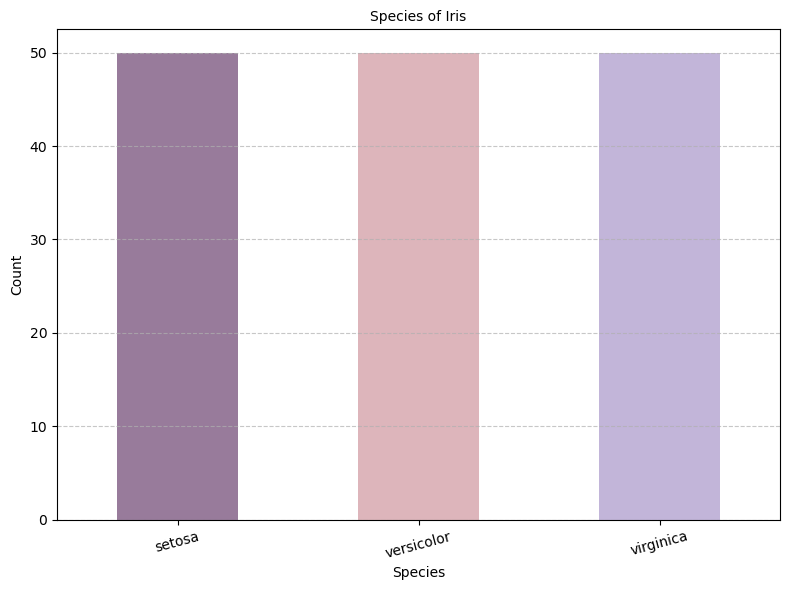

Congratulations! An image of the 'species' bar chart has been created!


In [13]:
# Data visualisation of 'Iris Species' in a bar chart

# Step 1: Define the bar colors for each species
colors = ['#987b9b', '#ddb5bb', '#c2b5d9',]

# Step 2: Create the Bar Chart
plt.figure(figsize=(8, 6)) # Set the size of the plot
species_counts.plot(kind='bar', color=colors)

# Step 3: - Styling the Bar Chart
plt.title('Species of Iris', size=10) # Set the title and font size
plt.xlabel('Species') # Label for the x-axis
plt.ylabel('Count') # Label for the y-axis
plt.xticks(rotation=15) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 4: - Save the Bar Chart
# plt.savefig("./charts/species_bar-chart.png") # Save the bar chart as a .png file

# Step 5: - Display the Bar Chart
plt.show() # Display the plot

# Step 6: - Confirmation message that the image file has been created
print("Congratulations! An image of the 'species' bar chart has been created!")

<sub><b>Analysis:</b> This bar chart provides visual confirmation that this a balanced dataset, with each species represented by a count of 50.</sub>
<br><br>
<sub><b>Source</b>: [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)</sub>
<br>
<sub><b>Source</b>: [matplotlib.pyplot.figure() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-figure-in-python/)</sub>
<br><br>

***

#### <a class="anchor" id="section7"><font color='#866c46'><b>Section 7: Data Visualisation (Histogram)</b></font></a>

<sub>Creating a histogram for the Iris dataset is a vital step in this exploratory data analysis process. Histograms provide a great visual representation of the distribution of a dataset's numerical variables (i.e. sepal length, sepal width, petal length, and petal width). This visualisation helps us to understand the frequency distribution of these measurements across the Iris dataset.</sub>

<sub>Python offers efficient tools, such as Matplotlib that allow for the easy generation of histograms, offering insights into the shape, spread, and central tendency of the data.</sub>

<sub><font color='#653a63'><b>7.1 - Sepal Length</b></font></sub>

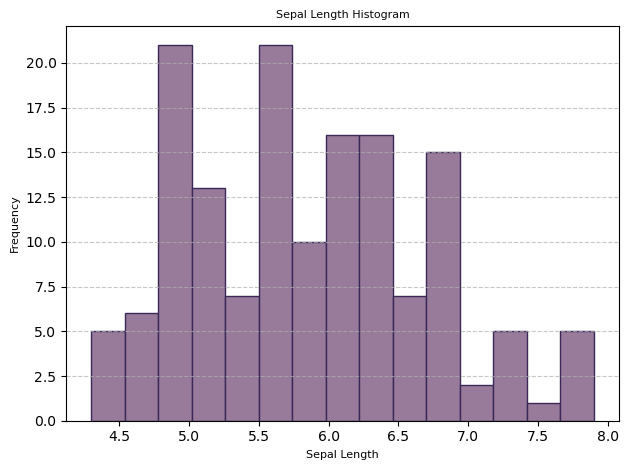

Congratulations! An image of the 'sepal length' histogram has been created!


In [14]:
# Step 1: Create the Histogram
plt.hist(iris['sepal_length'], bins=15, color='#987b9b', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Sepal Length Histogram", size=8, color="#060505") # Set the title with specified font size and color
plt.xlabel('Sepal Length', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("./histograms/sepal_length.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'sepal length' histogram has been created!")

<sub><b>Analysis:</b> The histogram appears to be approximately bell-shaped, suggesting that the sepal lengths might follow a normal distribution. Most of the values fall between 5 and 7 cm.</sub>
<br><br>

<sub><font color='#653a63'><b>7.2 - Sepal Width</b></font></sub>

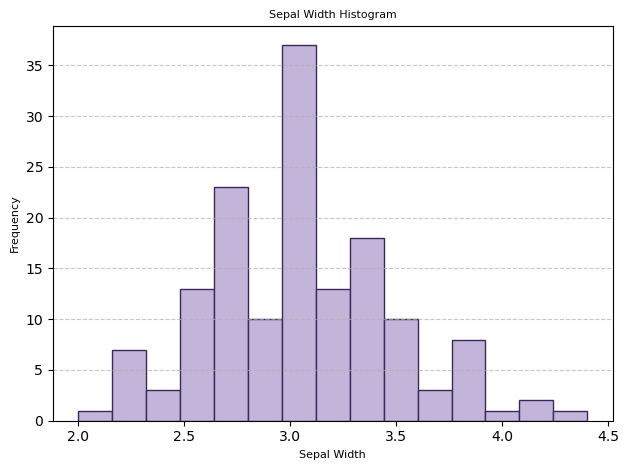

Congratulations! An image of the 'sepal width' histogram has been created!


In [15]:
# Step 1: Create the Histogram
plt.hist(iris['sepal_width'], bins=15, color='#c2b5d9', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Sepal Width Histogram", size=8, color="#060505") # Set the title with specified font size and color
plt.xlabel('Sepal Width', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("./histograms/sepal_width.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'sepal width' histogram has been created!")

<sub><b>Analysis:</b> The histogram appears to be slightly skewed to the left, with most values falling between 2.5 and 3.5 cm.</sub>
<br><br>

<sub><font color='#653a63'><b>7.3 - Petal Length</b></font></sub>

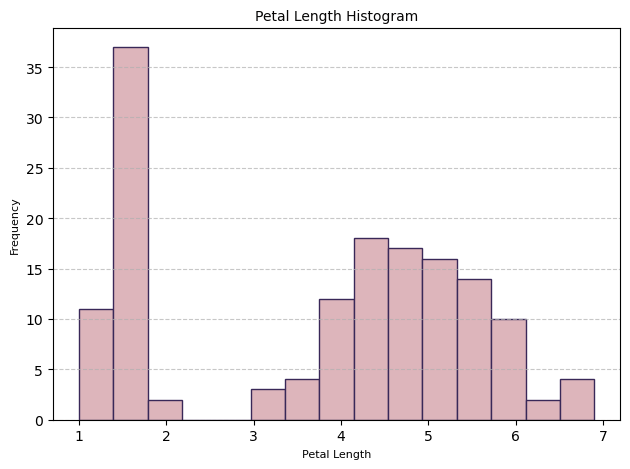

Congratulations! An image of the 'petal length' histogram has been created!


In [16]:
# Step 1: Create the Histogram
plt.hist(iris['petal_length'], bins=15, color='#ddb5bb', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Petal Length Histogram", size=10, color="#060505") # Set the title with specified font size and color
plt.xlabel('Petal Length', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("./histograms/petal_length.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'petal length' histogram has been created!")

<sub><b>Analysis:</b> The distribution is bimodal, as there are 2 distinct peaks. This suggests that petal length can vary among the different species of Iris.</sub>
<br><br>

<sub><font color='#653a63'><b>7.4 - Petal Width</b></font></sub>

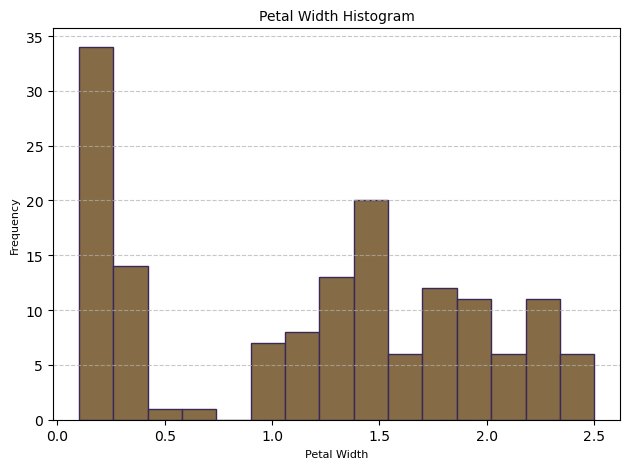

Congratulations! An image of the 'petal width' histogram has been created!


In [17]:
# Step 2: Create the Histogram
plt.hist(iris['petal_width'], bins=15, color='#866c46', edgecolor='#392858')

# Step 3: Style the Histogram
plt.title("Petal Width Histogram", size=10, color="#060505")
plt.xlabel('Petal Width', size=8)
plt.ylabel('Frequency', size=8)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 4: Save the figure
# plt.savefig("./histograms/petal_width.png")

# Step 5: Show the file
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'petal width' histogram has been created!")

<sub><b>Analysis:</b> This distribution is also bimodal, similar to petal length. This would suggest that petal width will vary significantly between species.</sub>
<br><br>

<sub><font color='#653a63'><b>7.5 - Combined Histogram (Option 1)</b></font></sub>

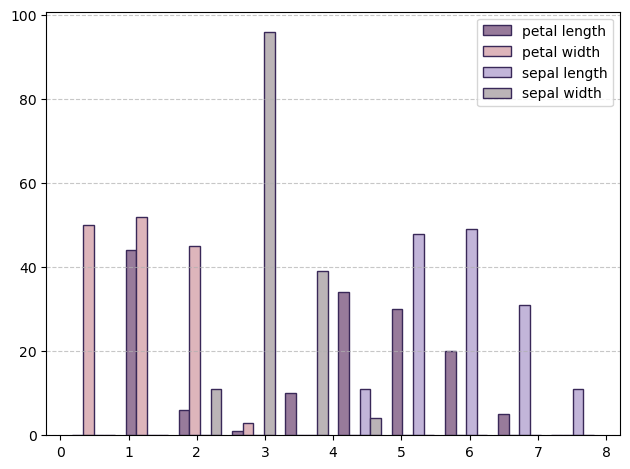

Congratulations! An image of the 'combined option 1' histogram has been created!


In [18]:
# Step 1: Define the bar colors
colors = ['#987b9b', '#ddb5bb', '#c2b5d9', '#bbb4b7']

# Step 2: Style the Histogram
plt.hist([iris['petal_length'], iris['petal_width'], iris['sepal_length'], iris['sepal_width']], label=['petal length', 'petal width', 'sepal length', 'sepal width'], color=colors, edgecolor='#392858', bins=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis``
plt.tight_layout()

# Step 4: Save the figure
# plt.savefig("./histograms/combined_option1.png")

# Step 5: Show the file
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'combined option 1' histogram has been created!")

<br>
<sub><font color='#653a63'><b>7.6 - Combined Histogram (Option 2)</b></font></sub>

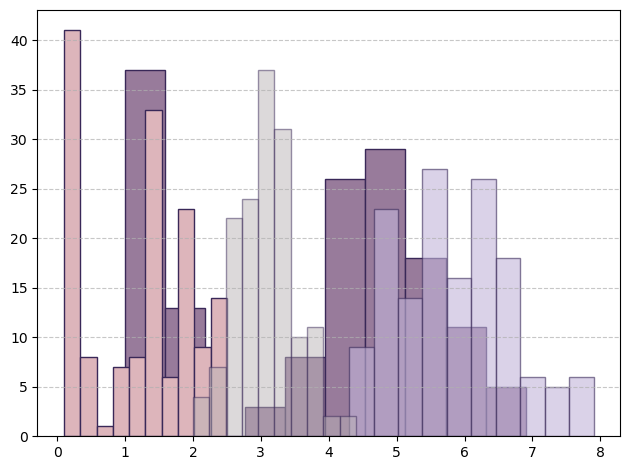

Congratulations! An image of the 'combined option 2' histogram has been created!


In [19]:
# Step 1: Plot and Style the Histogram
plt.hist(iris['petal_length'], color='#987b9b', edgecolor='#392858') # Add color
plt.hist(iris['petal_width'], color='#ddb5bb', edgecolor='#392858', alpha=1) # Add color and transparency level
plt.hist(iris['sepal_length'], color='#c2b5d9',edgecolor='#392858', alpha=0.6) # Add color and transparency level
plt.hist(iris['sepal_width'], color='#bbb4b7', edgecolor='#392858', alpha=0.5) # Add color and transparency level
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout()

# Step 2: Save the figure
# plt.savefig("./histograms/combined_option2.png")

# Step 3: Show the file
plt.show()

# Step 4: Confirmation message that the image file has been created
print("Congratulations! An image of the 'combined option 2' histogram has been created!")

<sub><b>source</b>: [Python Histogram Plotting: NumPy, Matplotlib, pandas & Seaborn](https://realpython.com/python-histograms/)</sub>
<br>
<sub><b>source</b>: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)</sub>
<br>
<sub><b>source</b>: [Matplotlib.pyplot.savefig() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-savefig-in-python/)</sub>
<br>
<sub><b>source</b>: [How to Interpret Histograms](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)</sub>


***

#### <a class="anchor" id="section8"><font color='#866c46'><b>Section 8: Data Visualisation (Two Variable Plot)</b></font></a>

A scatter (two variable) plot is a visual representation of how two variables relate to each other. We will now use several scatter plots to explore the relationship between both sets of variables in the Iris dataset.

<sub><b>source</b>: [Visualizing Data in Python Using plt.scatter()](https://realpython.com/visualizing-python-plt-scatter/)</sub>

<sub><font color='#653a63'><b>8.1 - Petal Length vs. Petal Width</b></font></sub>

In [20]:
# Step 1: Get just the petal length
plen = iris['petal_length'].to_numpy() # Converts dataframe to a NumPy array

# Step 2: Display the data
plen

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [21]:
# Step 1: Get just the petal width
pwidth = iris['petal_width'].to_numpy() # Converts dataframe to a NumPy array

# Step 2: Display the data
pwidth

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

<sub><font color='#653a63'><b>8.1.1 - Add a Straight Line</b></font></sub>
<br><br>
<sub><b>source</b>: [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)</sub>
<br>
<sub><b>source</b>: [Principles of Data Analytics - t08v05](https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/principles_of_data_analytics/08_best_fit/t08v05_correlation.mkv?csf=1&web=1&e=F50RRb&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D)</sub>

$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$

In [22]:
# Fit a straight line between x and y
m, c = np.polyfit(plen, pwidth, 1)

# Show m and c
m, c

(0.41575541635241153, -0.36307552131902887)

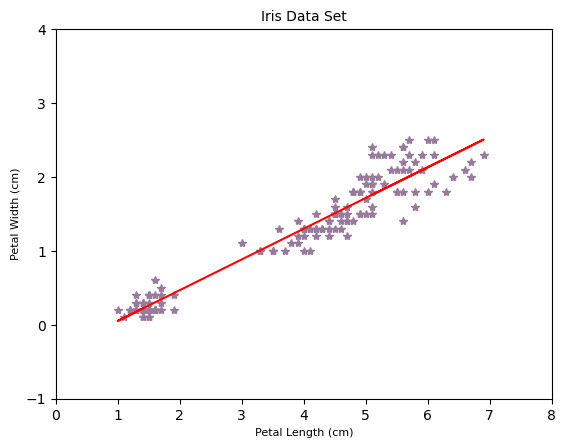

Congratulations! An image of the 'petal length vs. petal width best fit line' plot has been created!


In [23]:
# Step 1: Create a new figure and set of axis
fig, ax = plt.subplots()

# Step 2: Create a Simple Plot
ax.plot(plen, pwidth, '*', color='#987b9b')
ax.plot(plen, m * plen + c, 'r-')

# Step 3: Add Axis labels
ax.set_xlabel('Petal Length (cm)', size=8)
ax.set_ylabel('Petal Width (cm)', size=8)

# Step 4: Add Title
ax.set_title('Iris Data Set', size=10)

# Step 5: Set X and Y Limits
ax.set_xlim(0.0, 8.0)
ax.set_ylim(-1.0, 4.0)

# Step 6: Save the figure
plt.savefig("./plots/plen-v-pwdith-best-fit.png")

# Step 7: Show the file
plt.show()

# Step 8: Confirmation message that the image file has been created
print("Congratulations! An image of the 'petal length vs. petal width best fit line' plot has been created!")

<br>
<sub><font color='#653a63'><b>8.1.2 - Correlation Analysis</b></font></sub>

In [24]:
# Measure the correlation
petalcorr = np.corrcoef(plen, pwidth) # Create a correlation matrix
print(petalcorr)

[[1.         0.96286543]
 [0.96286543 1.        ]]


<sub><b>Value of correlation</b>: 0.96286543</sub>
<br><br>
<sub><b>Analysis</b>: The correlation matrix indicates that the two variables being analyzed have a very strong positive correlation, almost close to perfect correlation, as indicated by the correlation coefficient of approximately 0.9629.</sub>
<br><br>
<sub><b>source</b>: [Create a correlation Matrix using Python](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/)</sub>
<br>
<sub><b>source</b>: [Principles of Data Analytics - t08v05](https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/principles_of_data_analytics/08_best_fit/t08v05_correlation.mkv?csf=1&web=1&e=F50RRb&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D)</sub>

<br>
<sub><font color='#653a63'><b>8.1.3 - Update Txt File</b></font></sub>

In [25]:
# Step 1: Write the correlation matrix to our existing text file

with open("./summary/iris_summary.txt", "a") as file: # Using the append mode
    file.write(("Correlation Analysis\n\n"))
    file.write(("1. Petal Length vs. Petal Width\n\n")+(str(petalcorr)+('\n\n')))

# Step 2: Confirmation message that the file has been created
print("Congratulations! You added the Correlation Analysis to the iris_summary.txt")

Congratulations! You added the Correlation Analysis to the iris_summary.txt


<sub><b>source</b>: [How to Modify a Text File in Python](https://www.askpython.com/python/built-in-methods/modify-text-file-python)</sub>
<br>
<sub><b>source</b>: [Principles of Data Analytics - t08v05](https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/principles_of_data_analytics/08_best_fit/t08v05_correlation.mkv?csf=1&web=1&e=F50RRb&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D)</sub>

<br>
<sub><font color='#653a63'><b>8.2: Sepal Length vs. Sepal Width</b></font></sub>

In [26]:
# Get just the sepal length
slen = iris['sepal_length'].to_numpy() # Converts dataframe to a NumPy array

# Show the array
slen

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [27]:
# Get just the sepal width
swidth = iris['sepal_width'].to_numpy() # Converts dataframe to a NumPy array

# Show the array
swidth

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

<br>
<sub><font color='#653a63'><b>8.2.1 - Add a Straight Line</b></font></sub>
<br><br>
<sub>$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$</sub>

In [28]:
# Fit a straight line betwee x and y
m, c = np.polyfit(slen, swidth, 1)

# Show m and c.
m, c

(-0.06188479796414426, 3.4189468361038147)

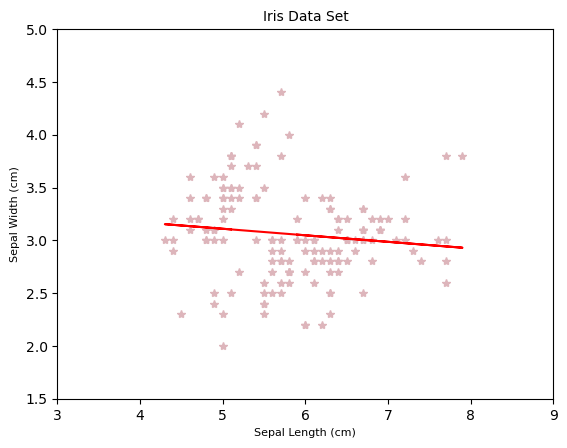

Congratulations! An image of the 'sepal length vs. sepal with straight line' plot has been created!


In [29]:
# Step 1: Create a new figure and set of axis
fig, ax = plt.subplots()

# Step 2: Create a simple plot
ax.plot(slen, swidth, '*', color='#ddb5bb')
ax.plot(slen, m * slen + c, 'r-')

# Step 3: Add Axis labels
ax.set_xlabel('Sepal Length (cm)', size=8)
ax.set_ylabel('Sepal Width (cm)', size=8)

# Step 4: Add a Title
ax.set_title('Iris Data Set', size=10)

# Step 5: Set X and Y Limits
ax.set_xlim(3.0, 9.0)
ax.set_ylim(1.5, 5.0)

# Step 6: Save the figure
plt.savefig("./plots/slen-v-swdith-straight-line.png")

# Step 7: Show the file
plt.show()

# Step 8: Confirmation message that the image file has been created
print("Congratulations! An image of the 'sepal length vs. sepal with straight line' plot has been created!")

<br>
<sub><font color='#653a63'><b>8.2.2 - Correlation Analysis</b></font></sub>

In [30]:
# Measure the correlation
sepalcorr = np.corrcoef(slen, swidth) # Create a correlation matrix
print(sepalcorr)

[[ 1.         -0.11756978]
 [-0.11756978  1.        ]]


<sub><b>Value of correlation</b>: -0.11756978</sub>
<br><br>
<sub><b>Analysis</b>: The correlation matrix indicates that the two variables being analyzed have a very weak negative correlation. This means that as one variable increases, the other tends to decrease, but the relationship is not very strong.</sub>
<br><br>
<sub><b>source</b>: [Create a correlation Matrix using Python](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/)</sub>
<br>
<sub><b>source</b>: [Principles of Data Analytics - t08v05](https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/principles_of_data_analytics/08_best_fit/t08v05_correlation.mkv?csf=1&web=1&e=F50RRb&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D)</sub>

<br>
<sub><font color='#653a63'><b>8.2.3 - Update Txt File</b></font></sub>

In [31]:
# Step 1: Write the next correlation matrix to our existing text file

with open("./summary/iris_summary.txt", "a") as file: # Using the append mode
    file.write(("2. Sepal Length vs. Sepal Width\n\n")+(str(sepalcorr)+('\n\n')))

# Step 2: Confirmation message that the file has been created
print("Congratulations! You added another Correlation Analysis to the iris_summary.txt")

Congratulations! You added another Correlation Analysis to the iris_summary.txt


<sub><b>source</b>: [How to Modify a Text File in Python](https://www.askpython.com/python/built-in-methods/modify-text-file-python)</sub>

***

#### <a class="anchor" id="section8"><font color='#866c46'><b>Section 9: Experimenting with Seaborn Library</b></font></a>

<sub>To finish up my exploratory analysis of the Iris dataset, I will be creating some quick (and easier) data visualisations using the Seaborn library in Python.</sub>

<sub><font color='#653a63'><b>9.1 - Scatter Plot (Petal Length vs. Petal Width)</b></font></sub>

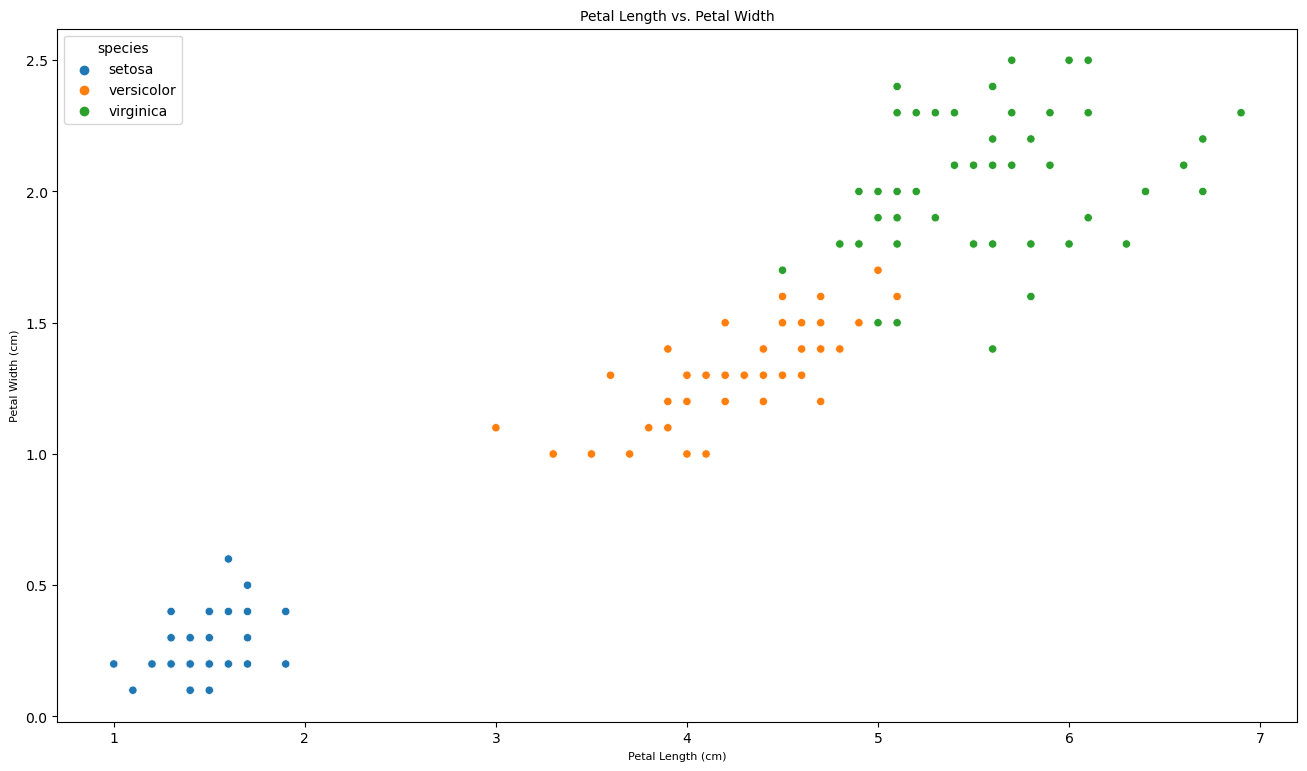

Congratulations! An image of the 'seaborn plen vs pwdith scatter plot' has been created!


In [32]:
# Step 1: Create Scatter Plot
plt.figure(figsize=(16,9))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

# Step 2: Add Title and Labels
plt.title('Petal Length vs. Petal Width', size='10')
plt.xlabel('Petal Length (cm)', size='8')
plt.ylabel('Petal Width (cm)', size='8')

# Step 3: Save the Scatter Plot
# plt.savefig("./seaborn/plen-v-pwidth-seaborn-scatter.png") # Save the plot as a .png file

# Step 4: Show Scatter Plot
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'seaborn plen vs pwdith scatter plot' has been created!")

<sub><b>Analysis</b>: The plot shows that Setosa's can be easily distinguished from the other species of Iris flowers. Whilst there is some overlapping between Versicolor and Virginica, the latter species has some larger values across both 'petal length' and 'petal width'.</sub>

<sub><font color='#653a63'><b>9.2 - Scatter Plot (Sepal Length vs. Sepal Width)</b></font></sub>

<sub><b>Description</b>: Create a scatter plot to visualise the relationship between both sets of variables in the Iris dataset</sub>

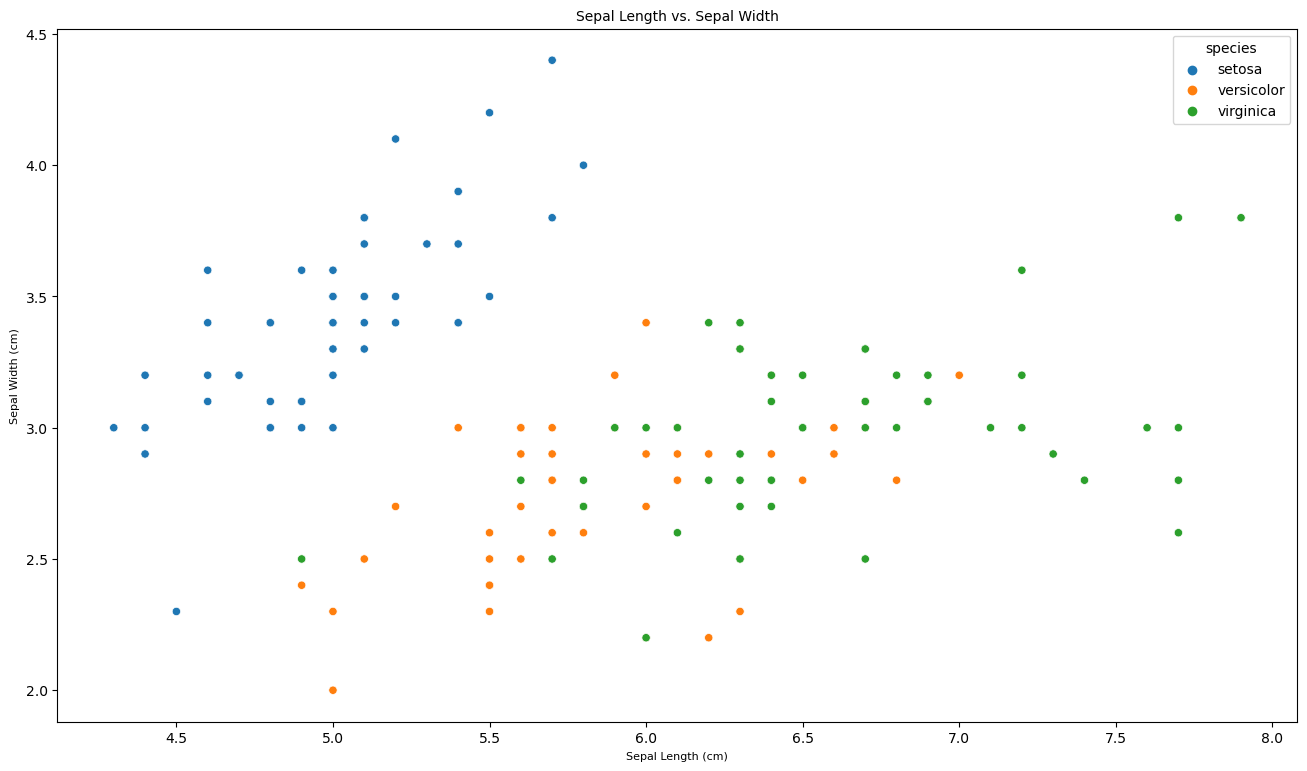

Congratulations! An image of the 'seaborn slen vs swdith scatter plot' has been created!


In [33]:
# Step 1: Create Scatter Plot
plt.figure(figsize=(16,9))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

# Step 2: Add Title and Labels
plt.title('Sepal Length vs. Sepal Width', size='10')
plt.xlabel('Sepal Length (cm)', size='8')
plt.ylabel('Sepal Width (cm)', size='8')

# Step 3: Save the Scatter Plot
# plt.savefig("./seaborn/slen-v-swidth-seaborn-scatter.png") # Save the plot as a .png file

# Step 4: Show Scatter Plot
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'seaborn slen vs swdith scatter plot' has been created!")

<sub><b>Analysis</b>: The plot shows that Setosa's generally have a higher sepal width and lower sepal length, compared to the other species of Iris. There's more overlap between Versicolor and Virginica with the exception of sepal length, where Virginica's have longer sepals.</sub>

<sub><b>source</b>: [Scatterplot Matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html)

<sub><font color='#653a63'><b>9.3 - Pair Plot</b></font></sub>

<sub><b>Description</b>: Create a pair plot to visualise relationships between all features in the Iris dataset</sub>

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


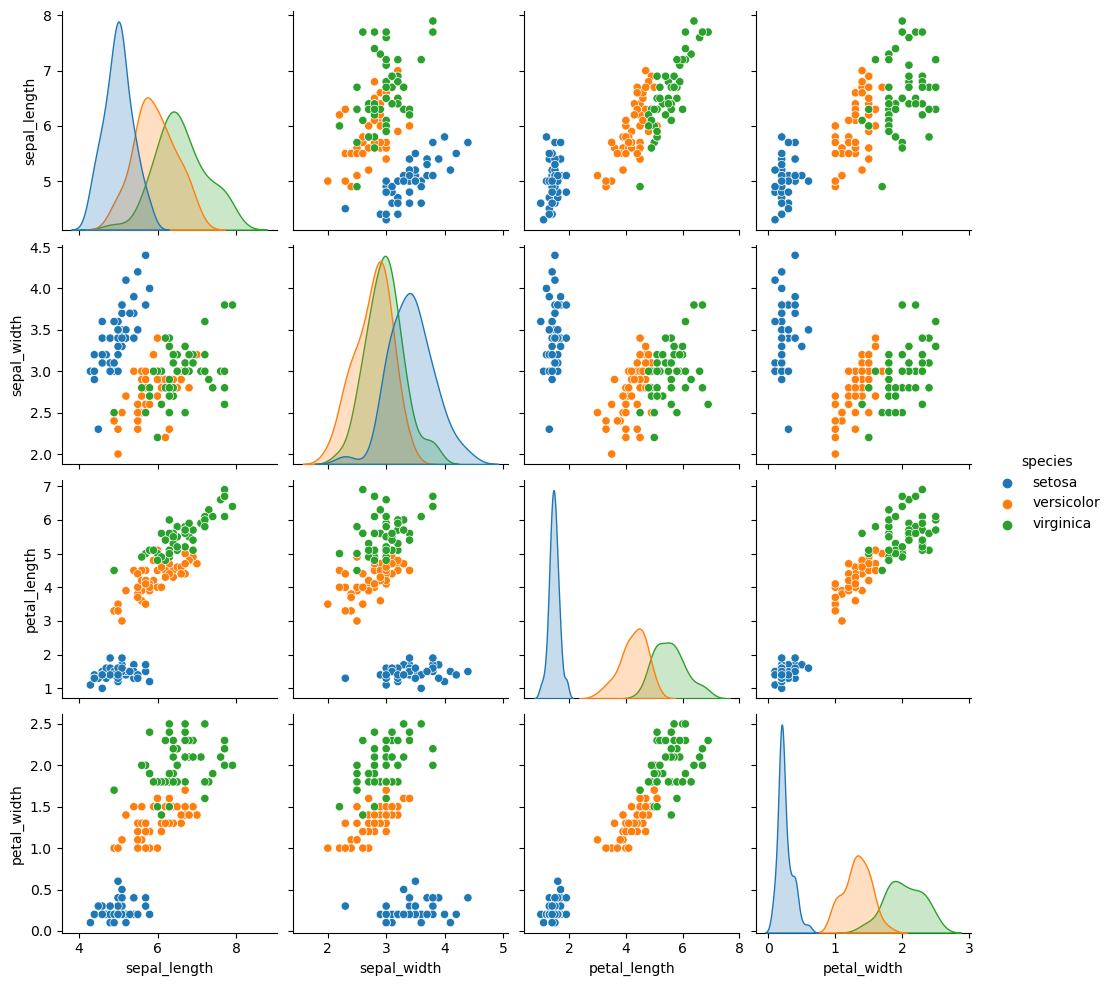

Congratulations! An image of the 'iris pair plot' has been created!


In [34]:
# Step 1: Create Pair Plot
sns.pairplot(iris, hue='species')

# Step 2: Save the Pair Plot
# plt.savefig("./seaborn/iris-pair-plot.png") # Save the plot as a .png file

# Step 3: Show Scatter Plot
plt.show()

# Step 4: Confirmation message that the image file has been created
print("Congratulations! An image of the 'iris pair plot' has been created!")

<sub><b>Analysis</b>: As mentioned above, Setosa stands alone from the other species of Iris, especially in petal length and petal width. These features are especially effective to differentiate the species of Iris.</sub>

<sub><b>source</b>: [Scatterplot Matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html)

<sub><font color='#653a63'><b>9.4 - Multiple Linear Regression (Petal Length vs. Petal Width)</b></font></sub>

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


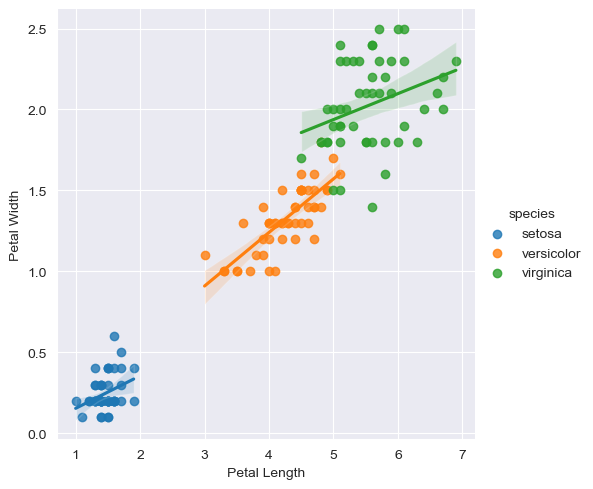

Congratulations! An image of the 'plen vs pwdith lmplot' has been created!


In [37]:
# Step 1: Create the Plot
g = sns.lmplot(data=iris, x="petal_length", y="petal_width", hue="species", height=5)
g.set_axis_labels("Petal Length", "Petal Width")

# Step 2: Add a Dark Grid
sns.set_style("darkgrid")

# Step 3: Save the Plot
# plt.savefig("./seaborn/plen-vs-pwdith-lmplot.png") # Save the plot as a .png file

# Step 4: Show the Plot
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'plen vs pwdith lmplot' has been created!")

<sub><b>Analysis</b>: The regression lines suggest that there is a positive correlation between petal length and petal width for all three species. Setosa has the most shallow slope, meaning there is a weaker linear relationship compared to Versicolor and Virginica.</sub>

<sub><font color='#653a63'><b>9.5 - Multiple Linear Regression (Sepal Length vs. Sepal Width)</b></font></sub>
<br><br>
<sub><b>source</b>: [Multiple linear regression](https://seaborn.pydata.org/examples/multiple_regression.html)

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


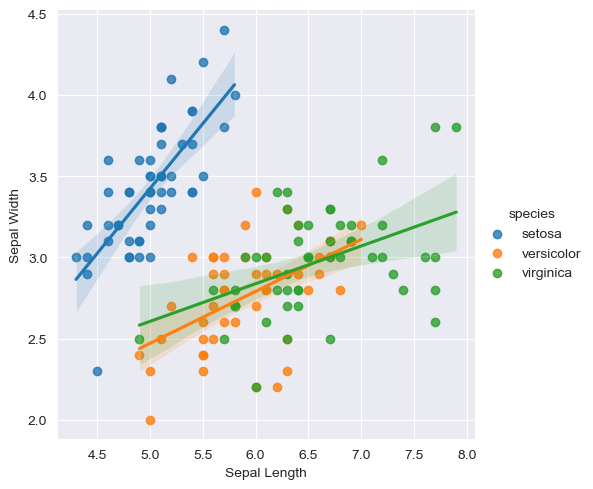

Congratulations! An image of the 'slen vs swdith lmplot' has been created!


In [36]:
# Step 1: Create the Plot
g = sns.lmplot(data=iris, x="sepal_length", y="sepal_width", hue="species", height=5)
g.set_axis_labels("Sepal Length", "Sepal Width")

# Step 2: Add a Dark Grid
sns.set_style("darkgrid")

# Step 3: Save the Plot
# plt.savefig("./seaborn/slen-vs-swdith-lmplot.png") # Save the plot as a .png file

# Step 4: Show the Plot
plt.show()

# Step 5: Confirmation message that the image file has been created
print("Congratulations! An image of the 'slen vs swdith lmplot' has been created!")

<sub><b>Analysis</b>: The Setosa species is clearly separable from the other Iris species, where there is a significant overlap. This overlap indicates that using sepal dimensions alone may not be enough to distinguish between Versicolor and Virginica.</sub>

***

##### End